In [1]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.7 MB/s eta 0

In [1]:
from google.colab import files
uploads = files.upload()

Saving cleaned_reviews[1].csv to cleaned_reviews[1].csv


In [2]:
from pycaret.datasets import get_data
data = get_data('cleaned_reviews[1]')

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5.0
1,neutral,i ve learned this lesson again open the packag...,88,1.0
2,neutral,it is so slow and lags find better option,9,2.0
3,neutral,roller ball stopped working within months of m...,12,1.0
4,neutral,i like the color and size but it few days out ...,21,1.0


In [3]:
import numpy as np, pandas as pd

In [5]:
dataset = pd.read_csv('cleaned_reviews[1].csv')
dataset.head()

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5.0
1,neutral,i ve learned this lesson again open the packag...,88,1.0
2,neutral,it is so slow and lags find better option,9,2.0
3,neutral,roller ball stopped working within months of m...,12,1.0
4,neutral,i like the color and size but it few days out ...,21,1.0


In [6]:
train_set = dataset.sample(frac=0.8, random_state=786)
test_set = dataset.drop(train_set.index)

train_set.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)

print('Train DataSet: ' + str(train_set.shape))
print('Test Dataset: ' + str(test_set.shape))


Train DataSet: (13872, 4)
Test Dataset: (3468, 4)


In [9]:
from pycaret.classification import *
start = setup(data = train_set, target = 'sentiments', session_id=123, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,123
1,Target,sentiments
2,Target type,Multiclass
3,Target mapping,"negative: 0, neutral: 1, positive: 2"
4,Original data shape,"(13872, 4)"
5,Transformed data shape,"(13872, 4)"
6,Transformed train set shape,"(9710, 4)"
7,Transformed test set shape,"(4162, 4)"
8,Numeric features,2
9,Categorical features,1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [12]:
ds_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6690,0.7278,0.6690,0.7881,0.6119,0.3146,0.4302,0.8180
nb,Naive Bayes,0.6689,0.7407,0.6689,0.7878,0.6117,0.3145,0.4300,0.5630
ridge,Ridge Classifier,0.6467,0.0000,0.6467,0.6718,0.5695,0.2574,0.3519,0.3880
lr,Logistic Regression,0.6357,0.7556,0.6357,0.6649,0.6301,0.3348,0.3390,1.1850
svm,SVM - Linear Kernel,0.5631,0.0000,0.5631,0.6310,0.5161,0.2184,0.2591,0.5090
dummy,Dummy Classifier,0.5468,0.5000,0.5468,0.2989,0.3865,0.0000,0.0000,0.7590
et,Extra Trees Classifier,0.5174,0.7034,0.5174,0.6916,0.4843,0.2030,0.2778,1.2050
lda,Linear Discriminant Analysis,0.5170,0.7465,0.5170,0.7395,0.4705,0.2156,0.3245,0.7580
knn,K Neighbors Classifier,0.5148,0.6235,0.5148,0.6553,0.4773,0.1984,0.2672,0.5600
dt,Decision Tree Classifier,0.4990,0.6061,0.4990,0.7892,0.4376,0.1947,0.3310,0.8640


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [13]:
selected_model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5026,0.6086,0.5026,0.7896,0.4431,0.1998,0.3362
1,0.4912,0.5997,0.4912,0.7876,0.4256,0.1830,0.3203
2,0.4964,0.6037,0.4964,0.7885,0.4339,0.1857,0.3183
3,0.5242,0.6256,0.5242,0.7936,0.4743,0.2344,0.3699
4,0.5005,0.6076,0.5005,0.7896,0.4405,0.1978,0.3344
5,0.4985,0.6060,0.4985,0.7892,0.4378,0.1919,0.3261
6,0.5026,0.6092,0.5026,0.7900,0.4427,0.2036,0.3425
7,0.4830,0.5939,0.4830,0.7866,0.4135,0.1708,0.3073
8,0.4964,0.6044,0.4964,0.7889,0.4339,0.1928,0.3307


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
tune_dt = tune_model(selected_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5541,0.5960,0.5541,0.4937,0.5178,0.1247,0.1299
1,0.5572,0.5889,0.5572,0.4942,0.5176,0.1253,0.1319
2,0.5654,0.6086,0.5654,0.5067,0.5318,0.1532,0.1580
3,0.5932,0.6459,0.5932,0.5296,0.5548,0.2012,0.2097
4,0.5469,0.5387,0.5469,0.2991,0.3867,0.0000,0.0000
5,0.5469,0.5176,0.5469,0.2991,0.3867,0.0000,0.0000
6,0.5469,0.5398,0.5469,0.2991,0.3867,0.0000,0.0000
7,0.5469,0.5406,0.5469,0.2991,0.3867,0.0000,0.0000
8,0.5716,0.6186,0.5716,0.5099,0.5350,0.1608,0.1672


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [18]:
print(ds_models)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


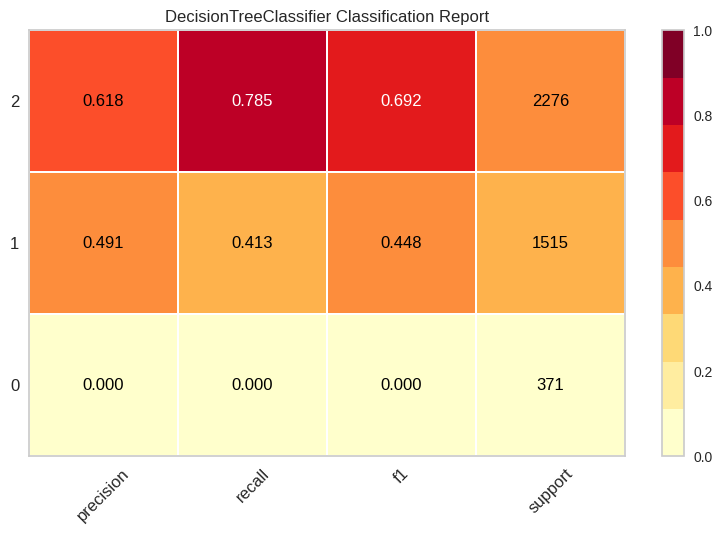

In [19]:
plot_model(tune_dt, plot = 'class_report')

In [20]:
evaluate_model(tune_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
final_dt = finalize_model(tune_dt)
print(final_dt)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['cleaned_review_length',
                                             'review_score'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_featur...
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              sm

In [22]:
save_model(final_dt, 'Final_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['cleaned_review_length',
                                              'review_score'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                                                               min_samples_leaf=20,
                                                               return_df=True,
                                                  

In [23]:
!pip install gradio

In [24]:
create_app(final_dt)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>